In [4]:
from food.tools import *
from food.paths import *
from food.psql import *

import pandas as pd
import numpy as np
from pathlib import Path

# !nbdev_build_lib

In [5]:
photos_path = testset_path/'test_photos'

In [7]:
testdf = pd.read_csv(testset_path/'test_set.csv')

testdf.columns = ['name_f','fat_f','protein_f','carbs_f','energy_f','','','','','weight_f','','url']
testdf = testdf.drop(columns = [c for c in testdf.columns if c == ''])
for c in ['fat_f','protein_f','energy_f','weight_f','carbs_f']:
    testdf[c] = testdf[c].str.replace(',','.').astype('float64')
testdf['url'] = testdf['url'].apply(lambda id:f"https://glovo.away.guru/test_photos/{id}.jpeg")

In [8]:
from food.search import *

In [15]:
r = []
fact = testdf.sample(10).reset_index(drop=True)
for image in fact['url'].tolist():
    r.append(search_image(image,env='prod'))

tensor([0.2825], dtype=torch.float64)
tensor([0.2960], dtype=torch.float64)
tensor([0.2966], dtype=torch.float64)
tensor([0.2969], dtype=torch.float64)
tensor([0.2969], dtype=torch.float64)
tensor([0.2163], dtype=torch.float64)
tensor([0.2285], dtype=torch.float64)
tensor([0.2317], dtype=torch.float64)
tensor([0.2317], dtype=torch.float64)
tensor([0.2317], dtype=torch.float64)
tensor([0.2190], dtype=torch.float64)
tensor([0.2279], dtype=torch.float64)
tensor([0.2296], dtype=torch.float64)
tensor([0.2295], dtype=torch.float64)
tensor([0.2295], dtype=torch.float64)
tensor([0.2296], dtype=torch.float64)
tensor([0.2296], dtype=torch.float64)
tensor([0.2415], dtype=torch.float64)
tensor([0.2556], dtype=torch.float64)
tensor([0.2578], dtype=torch.float64)
tensor([0.2577], dtype=torch.float64)
tensor([0.2578], dtype=torch.float64)
tensor([0.2578], dtype=torch.float64)
tensor([0.2435], dtype=torch.float64)
tensor([0.2515], dtype=torch.float64)
tensor([0.2520], dtype=torch.float64)
tensor([0.25

In [23]:
r[0]

,energy,protein,carb,fat,score,description
0,68.0,3.0,8.0,3.0,0.0,"Pasta with tomato-based sauce, and added veget..."


In [24]:
rr = fact.join(pd.concat(r).reset_index(drop=True))
rrr = rr[['energy_f','energy','url','description']]
rrr['error'] = (rrr['energy_f']/rrr['energy']-1).abs()

/tmp/ipykernel_1054155/4089825261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrr['error'] = (rrr['energy_f']/rrr['energy']-1).abs()


In [25]:
rrr = rrr.sort_values('error',ascending = False)

In [27]:
rrr

,energy_f,energy,url,description,error
3,146.72,53.0,https://glovo.away.guru/test_photos/a7d37b03-a...,"Basil, raw. Sushi roll, avocado. Sushi roll, C...",1.768302
8,328.85,148.0,https://glovo.away.guru/test_photos/52ccafcc-e...,"Tuna, fresh, coated, fried. Sushi roll, Califo...",1.221959
6,195.52,101.0,https://glovo.away.guru/test_photos/89ddf5af-5...,Chicken curry with rice. Chicken or turkey ric...,0.935842
4,230.54,138.0,https://glovo.away.guru/test_photos/4f91fd71-6...,"Sushi roll, California. Sushi, topped with sal...",0.670580
0,24.40,68.0,https://glovo.away.guru/test_photos/ce6becfb-1...,"Pasta with tomato-based sauce, and added veget...",0.641176
2,65.00,167.0,https://glovo.away.guru/test_photos/e441abe0-f...,"Sugar substitute, aspartame, powder. Beef, bro...",0.610778
9,146.00,343.0,https://glovo.away.guru/test_photos/bdf58151-f...,"Beef, broth, bouillon, or consomme. Cottonseed...",0.574344
5,166.14,131.0,https://glovo.away.guru/test_photos/28ac82f3-a...,"Sushi, topped with salmon. Tuna, fresh, coated...",0.268244
1,168.32,138.0,https://glovo.away.guru/test_photos/cae6897e-a...,"Broccoflower, raw. Wasabi peas. Sweet potato, ...",0.219710
7,123.98,124.0,https://glovo.away.guru/test_photos/aeaec195-a...,"Pasta with tomato-based sauce, and added veget...",0.000161


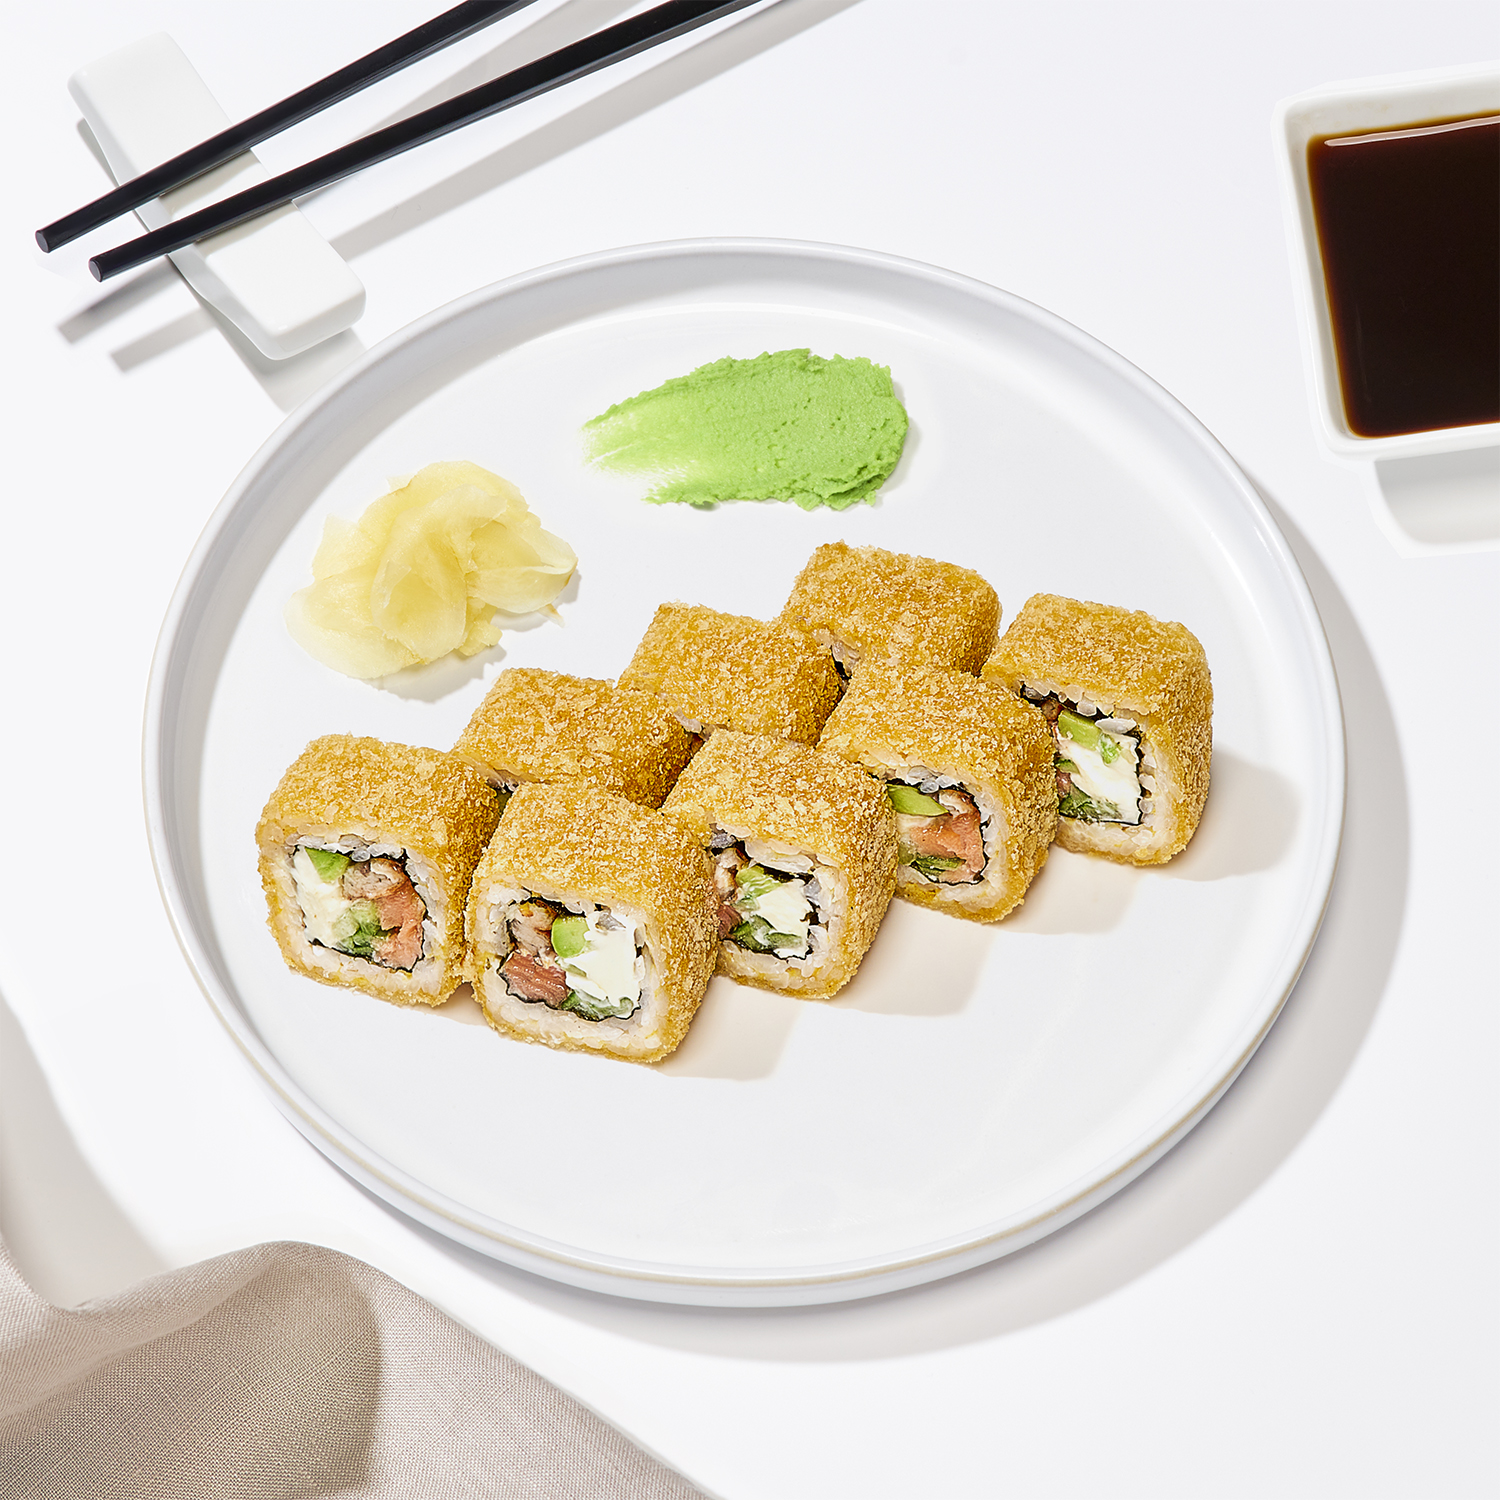

In [28]:
get_image_from_url(rrr.iloc[1]['url'])